# Spectral properties of the trap model on sparse networks 

## Ground state 

The long-time dynamics for the problem set up in the section 2 of the paper (Bouchaud transition rates over a random regular graph of $N$ nodes with exponentially distributed energies) is controlled by the following eigenvector (equation (6) of the manuscript)
$$
\lim_{t \rightarrow \infty} \mathbf{p}(t) = u_0 = \frac{1}{Z} (\rm{e}^{\beta E_1}, \ldots, \rm{e}^{\beta E_N}) \, ,
$$
that is the ground state of the master operator governing the dynamics (eigenvalue $\lambda_0 = 0$ for a non-positive spectrum).

Notice that this eigenvector is independent of the connectivity associated with the network as long as the network is connected.

The section 3.1 of the paper is devoted to the analysis of the ground state associated with the symmetric master operator,this is
$$
v_0 =  \dfrac{1}{\hat{Z} } (\rm{e}^{\beta E_1/2}, \ldots, \rm{e}^{\beta E_N/2})
$$
with $\hat{Z}$ the normalizing constant.

### Localisation measures

The analysis considers the localisation properties of the eigenvector and it is mad in terms of the inverse participation ration ($I_2$) defined as
$$
I_2(v) = \dfrac{\sum_{i=1}^N v_i^{4}}{(\sum_{i =1}^N v_i^{2})^2} \, .
$$

In these notes we reproduce the numerics given in Figure 2 of the article and extend the analysis by using the Shannon information entropy. 

For a discrete probability distribution $p = (p_1, \ldots, p_n)$, the Shannon entropy is calculated as
$$
S(p) = \sum_{i=1}^N \,  p_i \log(p_i) \, ,
$$
and it is also a measure of localisation, in the sense that for a strongly localised distribution the entropy tends to zero whereas for the most delocalised case the entropy yields a maximum.

So let's use the following parameters:

In [2]:
n_vertices = 1000 ##Number of sites
ensemble = 100 ##Number of realisations;

Range of temperatures:

In [3]:
T = 0.1:0.25:6.;

Arrays to save the data

In [4]:
I2 = zeros(ensemble); ##IPR
t2 = zeros(length(T)); ##Exponent
ent = zeros(ensemble) ##Entropy of the eigenvector
entropy = zeros(length(T)); ##Average entropy

Basic functions:

In [5]:
ipr(eigenvector) = sum(eigenvector.^4)/(sum(eigenvector.^2))^2.

ipr (generic function with 1 method)

In [6]:
function shannon(v) 
    eig = v.^2.
    eig /= sum(eig)
    return -sum(eig.*log.(eig))
end

shannon (generic function with 1 method)

Exponential distribution for the energies:

In [8]:
using Distributions
dene = Exponential(1.); ##Recall that T_g = 1

Main Loop:

In [9]:
j = 1
for temp in T
    beta = 1/temp
    for k in 1:ensemble
        energias = rand(dene,n_vertices)  ##Sample the energy distribution with size equal to the number of nodes
        eig_vec = exp.(beta*energias/2)   ##Equilibrium measure
        eig_vec /= sum(eig_vec)           ## Normalized
        I2[k] = ipr(eig_vec)            ## IPR of the eigenvector
        ent[k] = shannon(eig_vec)       ## Entropy of the eigenvector
    end
    t2[j] = mean(-log.(I2)./log(n_vertices))   ##Scaling of the IPR
    entropy[j] = mean(ent)                  ## Mean entropy
    j += 1
end

Now we display the results. The first aim is to reproduce the figure 2 of the manuscript whereas the second one is to show the behavior of the entropy and evaluate qualitatively its change at the glass transition $T_g = 1$. 

In [10]:
using Plots
using LaTeXStrings
pyplot()
Plots.scalefontsizes(1.5)

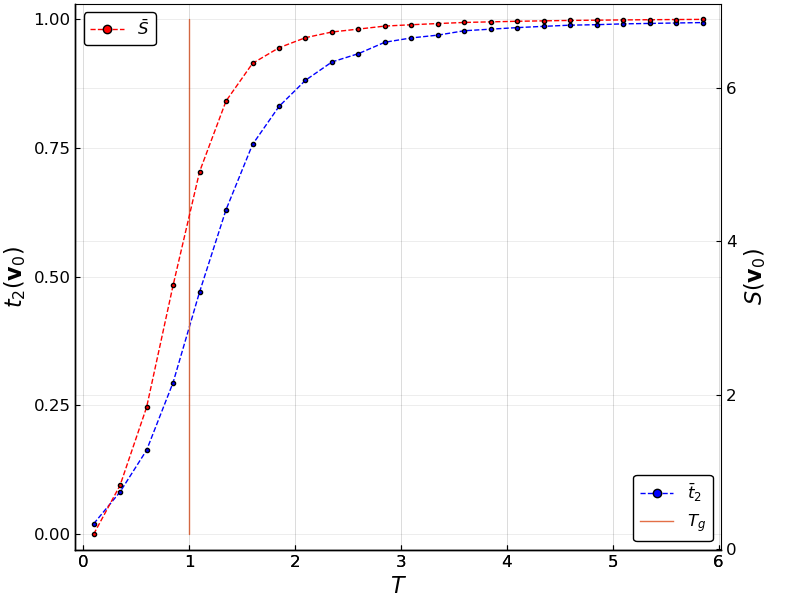

In [11]:
plot(T, t2, color=:blue, xlabel = L"T", ylabel = L"t_2(\mathbf{v}_0)", label = L"\bar{t}_2", marker = 3, style = :dash,
legend = :bottomright,  right_margin = Measures.Length{:mm,Float64}(20.))
plt = twinx()
plot!(plt, T, entropy, color=:red, ylabel = L"S(\mathbf{v}_0)", marker = 3, style = :dash, label = L"\bar{S}", 
    framestyle = :box, size = (800, 600))
plot!([1.,1.],[0., 1.], label = L"T_g")

So the entropy has changed completely at the glass transition which can be a good feature that allows to understand better the properties of the eigenvectors. Is this an interesting point? Compare perhaps with:

- [Bertin, JPA2013](http://iopscience.iop.org/article/10.1088/1751-8113/46/9/095004/meta)
- [Alba, 2016](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.93.094404)